# References
## Ross et al. (1982)
* Stimuli consisted of trains of electrical impulses (supramaximal for $\alpha$-axons, 200 $\mu$s wide) applied to the proximal end of cut ventral roots L7 or S1, more usually to portions of them.
* Dynamic responses of different Renshaw cells were tested by means of step changes in the input variables. For frequency, this involved stimulating antidromically for 5 s at a given frequency and then suddenly switched to a higher or lower stimulus frequency for another 5 s.
* Dynamic responses were similar no matter how large a portion of a ventral root was stimulated, and Fig. 3 shows that all results fall into a homogeneous population.

## Uchiyama et al. (2003a)
* Synaptic swellings are indications of the strength of an $\alpha$ motoneuron's synaptic inputs to other spinal neurons. The proportions used are those reported by Cullheim and Kellerth (1978), in which FF number is ca. 1.8 the FR number and ca. 2.2 the S number.
*  the dynamic step responses of individual Renshaw cells in the model developed have similar patterns to experimental responses.


# Parameters adjusted
* Connections and conductances

# Considerations
* Since 5 s is too much to simulate, the adaptation time is reduced and the plot shown is to assure the cell have adapted after the adopted value.
* For simplicity and to avoid recording silent Renshaw cells (which would in practice mean recording outside a given portion or delivering submaximal stimulation to motor axons), stimulations were simulated as a antidromic in the whole pool. This is acceptable because dynamic resonses are similar no matter how large a ventral root portion is, as argued by the authors. I should get a relation between pre and pos stimulus static rate and overshoot, just like they did. However, because overshoot values are not very promising, as shown in Uchiyama et al. (2003a), I did not try to replicate their Fig. 3 yet.
* Deafferentation resulted in no spontaneous responses.
* In Uchiyama et al. (2003a), Figure 7a multiplies number of spikes by 1/(50 ms) when the frequency is 33 Hz and reproduces a result from Ross et al. (1982). Figure 7c multiply number of spikes by the frequency of the steps, and reproduces results from another paper. Therefore, there is a small difference between results described in the literature, but this simulation will consider both in order to have more sources for comparison.
* I printed spike times because I am losting the last bin somewhere in the program. I did not fix this yet because it is not relevant for the final interpretation of the result.

In [1]:
import sys
import time

import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import scipy.optimize

<IPython.core.display.Javascript object>


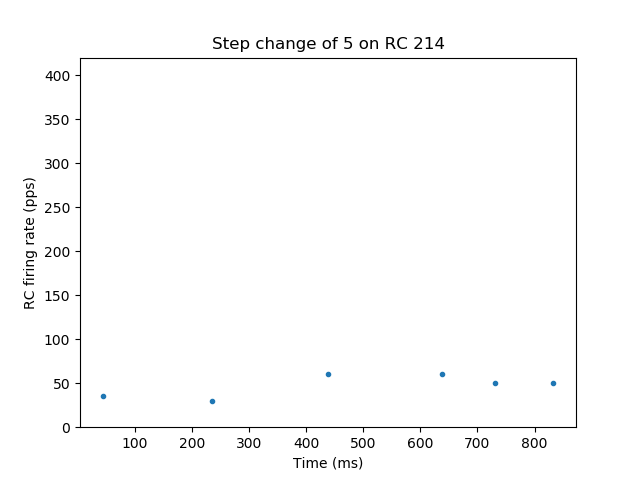

[13.1, 14.15, 15.2, 16.3, 20.75, 29.55, 42.95, 213.2, 214.25, 215.3, 216.7, 223.6, 234.9, 413.25, 414.3, 415.35, 417.1, 425.1, 437.8, 613.25, 614.3, 615.35, 617.1, 625.25, 638.1, 713.35, 714.4, 715.6, 719.5, 730.55, 813.4, 814.45, 815.7, 820.65, 833.1, 913.45, 914.5, 915.8, 921.15, 934.25]


<IPython.core.display.Javascript object>


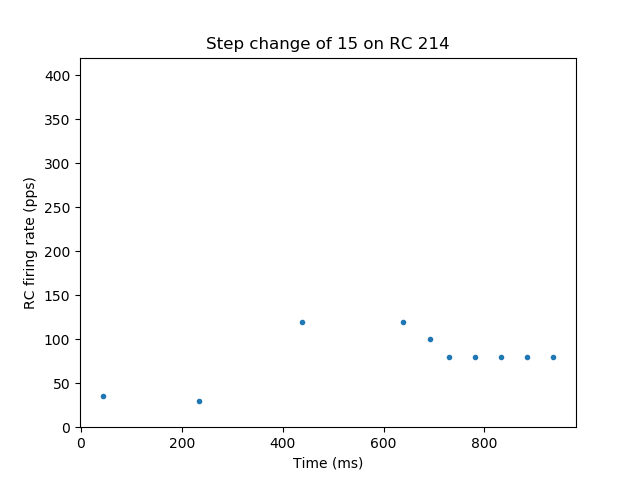

[13.1, 14.15, 15.2, 16.3, 20.75, 29.55, 42.95, 213.2, 214.25, 215.3, 216.7, 223.6, 234.9, 413.25, 414.3, 415.35, 417.1, 425.1, 437.8, 613.25, 614.3, 615.35, 617.1, 625.25, 638.1, 662.95, 664.2, 665.8, 673.9, 692.05, 713.35, 714.7, 717.5, 730.35, 763.3, 764.65, 767.4, 781.25, 813.4, 814.8, 818.0, 833.65, 863.45, 864.85, 868.4, 885.4, 913.5, 914.9, 918.7, 936.9, 963.5, 964.9, 968.85, 988.0]


<IPython.core.display.Javascript object>


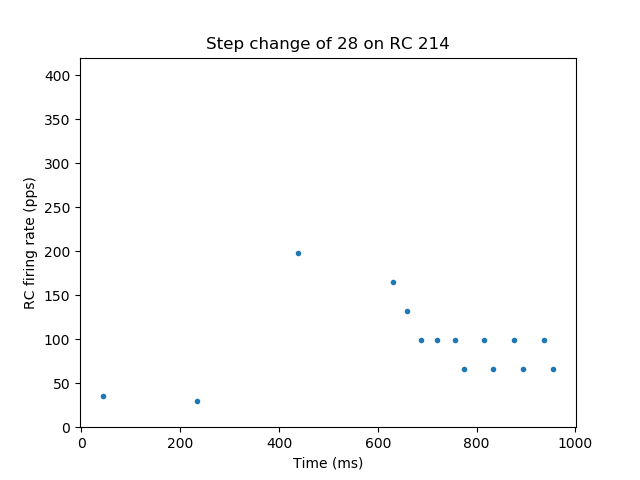

[13.1, 14.15, 15.2, 16.3, 20.75, 29.55, 42.95, 213.2, 214.25, 215.3, 216.7, 223.6, 234.9, 413.25, 414.3, 415.35, 417.1, 425.1, 437.8, 619.25, 620.3, 621.35, 623.05, 631.1, 643.75, 649.75, 651.6, 660.15, 678.75, 680.95, 687.1, 709.45, 711.65, 720.35, 740.45, 742.65, 755.65, 771.2, 773.75, 800.65, 802.9, 814.45, 831.75, 834.25, 861.25, 863.5, 875.4, 892.4, 894.95, 921.9, 924.15, 936.3, 953.0, 955.6, 982.5, 984.75, 996.9]


<IPython.core.display.Javascript object>


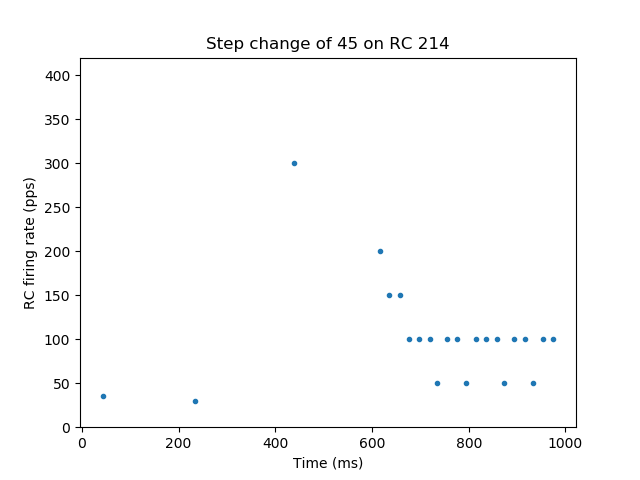

[13.1, 14.15, 15.2, 16.3, 20.75, 29.55, 42.95, 213.2, 214.25, 215.3, 216.7, 223.6, 234.9, 413.25, 414.3, 415.35, 417.1, 425.1, 437.8, 613.25, 614.3, 615.35, 617.1, 625.25, 633.05, 635.35, 644.55, 653.45, 657.95, 672.6, 676.25, 692.8, 697.05, 713.4, 719.2, 733.95, 742.55, 754.5, 772.35, 776.75, 793.65, 800.55, 814.3, 826.05, 835.1, 853.0, 857.85, 873.85, 882.0, 894.5, 912.45, 916.85, 933.7, 940.8, 954.3, 966.5, 975.15, 993.05, 997.95]


In [24]:
figsFolder = '/home/pablo/git/master-thesis/figuras/'
trial = 1
path = '/home/pablo/osf/Master-Thesis-Data/population/onion/false_decay/trial'+ str(trial)
filenamedyn = 'dyn'

simDuration_ms = 1000
stimPulseDuration = 0.2
timeStep_ms = 0.05
availableRCs = range(600)
frequency1 = 5

recordedRCIndex = np.random.choice(availableRCs)


freqs = [5, 15, 28, 45]
for i, freq in enumerate(freqs):
    firingRate = []
    unitNumber = []
    stimulus = []
    spikeInstant = []
    filename = 'output'+str(i+1)+'.dat'
    f = open(filename, 'r')
    lines = f.readlines()
    for line in lines:
        spikeInstant.append(float(line.split()[0]))
        unitNumber.append(int(float(line.split()[1])))
    f.close()
    filename = 'stimulus'+str(i+1)+'.dat'
    f = open(filename, 'r')
    lines = f.readlines()
    for line in lines:
        stimulus.append(float(line.split()[0]))
    f.close()
    
    # Roughly determines bins, that start after each nonzero value
    stimulusIntervals = np.nonzero(stimulus)[0]
    # How long the stimulus lasts, in indexes
    # +1 is a correction, since in Fortran is was lasting 5
    indexInterval = int(stimPulseDuration/timeStep_ms)+1
    # bins, excluding the ones that do not finish
    numberOfBins = int(len(stimulusIntervals)/indexInterval)
    # Creates one array for each bin
    bins = np.split(stimulusIntervals[:numberOfBins*indexInterval], numberOfBins)

    RCSpikeInstants = [y for x, y in enumerate(spikeInstant) if unitNumber[x]==recordedRCIndex]
    spikesPerBin = np.histogram(RCSpikeInstants, bins=[x[0]*timeStep_ms for x in bins])[0]
    binDuration1_ms = 1/float(frequency1)*1e3
    binDuration2_ms = 1/float(freq+5)*1e3

    # Since it is programmed to have only 2 spikes on the first stimulus frequency:
    firingRate = [y*1e3/binDuration1_ms if x<2 else y*1e3/binDuration2_ms for x,y in enumerate(spikesPerBin)]
    abscissae = []
    accumulate=0
    for spikePerBin in spikesPerBin:
        accumulate+=spikePerBin
        abscissae.append(RCSpikeInstants[accumulate-1])
    
    
    plt.figure()
    plt.plot(abscissae, firingRate, '.')
    plt.title('Step change of '+str(freq)+' on RC '+str(recordedRCIndex))
    plt.ylabel('RC firing rate (pps)')
    plt.xlabel('Time (ms)')
    plt.ylim([0, 420])
    plt.show()
    print RCSpikeInstants